In [100]:
import pandas as pd

In [101]:
pd_data = pd.read_csv('main.csv')

In [99]:
data = []
columns = list(pd_data.columns)
for i, item in pd_data.iterrows():
    dict_item = {key: item[key] for key in columns if key != 'Unnamed: 0'}
    data.append(dict_item)
data = [row for row in data if isinstance(row['no'], str) and row['no'].isdigit()]
# Sort by the main score
data = sorted(data, key=lambda x: float(x['Overall Score_score'].replace('%', '')), reverse=True)
print(len(data))

119


In [67]:
# Comprise family aggregated data, and include all human ones
family_aggregated = list()
family_found = set()
for item in data:
    if item['model_family'] == 'Human' or item['eval_type'] == 'Ablation': continue
    if item['model_family'] not in family_found:
        family_found.add(item['model_family'])
        family_aggregated.append(item)
for item in data:
    if item['model_family'] == 'Human':
        family_aggregated.append(item)


In [68]:
print(len(family_aggregated))

33


In [84]:

import math

def table_print(data, maxlen=7, prefix='', concat_family_name=False):
    i = 0
    for row in data:
        family, name = row['model_family'], row['print_name']
        if row['eval_type'] == 'Closed':
            family = '\\twemoji{locked}' + family
        model_type, model_domain = row['type'], row['domain']
        context_length = row['ctx_length']
        if isinstance(context_length, float) and math.isnan(context_length):
            context_length = '/'
        else:
            context_length = int(context_length)
        params = row['model_params']
        score = row['Overall Score_score']
        std = row['Overall Score_std']
        human_eval_score = row['humaneval']
        if (isinstance(human_eval_score, float) and math.isnan(human_eval_score)) or not human_eval_score.isdigit():
            human_eval_score = '/'
        score_print = score.replace('%', '\\%')
        if std != '0.00%':
            score_print += ' $\\pm$ ' + std.replace('%', '\\%')
        if model_domain == 'General':
            barname = 'generalpretrainbar' if model_type == 'Base' else 'generaltunebar'
            if float(score[:-1]) >= 35.:
                score_box = f'\\begin{{{barname}}}{{{float(score[:-1]) * maxlen / 100}cm}} \\flushright \\textcolor{{bargreen3}} {{{score_print}}} \\end{{{barname}}}'
            else:
                score_box = f'\\begin{{{barname}}}{{{float(score[:-1]) * maxlen / 100}cm}} \\end{{{barname}}} \\vspace{{-0.34cm}} \\textcolor{{bargreen3}} {{{score_print}}}'
        else:
            # Code
            barname = 'codepretrainbar' if model_type == 'Base' else 'codetunebar'
            if float(score[:-1]) >= 35.:
                score_box = f'\\begin{{{barname}}}{{{float(score[:-1]) * maxlen / 100}cm}} \\flushright \\textcolor{{bargreen3}} {{{score_print}}} \\end{{{barname}}}'
            else:
                score_box = f'\\begin{{{barname}}}{{{float(score[:-1]) * maxlen / 100}cm}} \\end{{{barname}}} \\vspace{{-0.34cm}} \\textcolor{{bargreen3}} {{{score_print}}}'
        # print(f'{i+1:2} & {family:8} & {name:25} & {model_domain:10} & {model_type:8} & {params:10} & {context_length:5} & {score_box} & {human_eval_score} \\\\')
        family_name = f'{family:8} & {name:25}' if not concat_family_name else f'{family}/{name}'
        print(prefix + f'{i+1:2} & {family_name:34} & {params:10} & {score_box} \\\\')

        i += 1
        # print(i, family, name, model_type, model_domain, score, std)

In [85]:
table_print(family_aggregated)

 1 & \twemoji{locked}GPT-4 & GPT-4-0613                & ?          & \begin{generaltunebar}{4.9448cm} \flushright \textcolor{bargreen3} {70.64\% $\pm$ 0.82\%} \end{generaltunebar} \\
 2 & \twemoji{locked}Claude 3 & Claude 3 Opus             & ?          & \begin{generaltunebar}{4.472300000000001cm} \flushright \textcolor{bargreen3} {63.89\%} \end{generaltunebar} \\
 3 & Mistral Open & Codestral-22b             & 22B        & \begin{codetunebar}{4.4086cm} \flushright \textcolor{bargreen3} {62.98\% $\pm$ 0.56\%} \end{codetunebar} \\
 4 & DeepSeek Coder & deepseek-coder-33b-instruct & 33B        & \begin{codetunebar}{4.4072000000000005cm} \flushright \textcolor{bargreen3} {62.96\%} \end{codetunebar} \\
 5 & Phind    & Phind-CodeLlama-34B-v2    & 34B        & \begin{codetunebar}{4.13cm} \flushright \textcolor{bargreen3} {59.00\%} \end{codetunebar} \\
 6 & \twemoji{locked}Mistral & mistral-large             & ?          & \begin{generaltunebar}{4.075399999999999cm} \flushright \textcolor{b

In [74]:
# Top 5 model by type

type_tops = list()

lim = 5
cnt = 0
for item in data:
    if item['eval_type'] == 'Closed':
        type_tops.append(item)
        cnt += 1
    if cnt >= lim:
        break

lim = 5
cnt = 0
for item in data:
    if item['eval_type'] == 'Open' and item['type'] == 'Finetuned' and item['domain'] == 'Code':
        type_tops.append(item)
        cnt += 1
    if cnt >= lim:
        break


lim = 5
cnt = 0
for item in data:
    if item['eval_type'] == 'Open' and item['type'] == 'Base' and item['domain'] == 'Code':
        type_tops.append(item)
        cnt += 1
    if cnt >= lim:
        break


lim = 5
cnt = 0
for item in data:
    if item['eval_type'] == 'Open' and item['type'] == 'Finetuned' and item['domain'] == 'General':
        type_tops.append(item)
        cnt += 1
    if cnt >= lim:
        break


lim = 5
cnt = 0
for item in data:
    if item['eval_type'] == 'Open' and item['type'] == 'Base' and item['domain'] == 'General':
        type_tops.append(item)
        cnt += 1
    if cnt >= lim:
        break

In [86]:
table_print(type_tops, prefix=' & ', concat_family_name=True)

 &  1 & \twemoji{locked}GPT-4/GPT-4-0613   & ?          & \begin{generaltunebar}{4.9448cm} \flushright \textcolor{bargreen3} {70.64\% $\pm$ 0.82\%} \end{generaltunebar} \\
 &  2 & \twemoji{locked}GPT-4/GPT-4-turbo-1106 & ?          & \begin{generaltunebar}{4.7894cm} \flushright \textcolor{bargreen3} {68.42\% $\pm$ 0.38\%} \end{generaltunebar} \\
 &  3 & \twemoji{locked}GPT-4/GPT-4o-2024-05-13 & ?          & \begin{generaltunebar}{4.6333cm} \flushright \textcolor{bargreen3} {66.19\%} \end{generaltunebar} \\
 &  4 & \twemoji{locked}Claude 3/Claude 3 Opus & ?          & \begin{generaltunebar}{4.472300000000001cm} \flushright \textcolor{bargreen3} {63.89\%} \end{generaltunebar} \\
 &  5 & \twemoji{locked}Mistral/mistral-large & ?          & \begin{generaltunebar}{4.075399999999999cm} \flushright \textcolor{bargreen3} {58.22\%} \end{generaltunebar} \\
 &  6 & Mistral Open/Codestral-22b         & 22B        & \begin{codetunebar}{4.4086cm} \flushright \textcolor{bargreen3} {62.98\% $\pm$ 0.56

In [98]:
# Top model by model size

size_thresholds = [100000, 30, 10, 3]

size_best = [None for _ in size_thresholds]
cur_best = [0. for _ in size_thresholds]

for item in data:
    if item['eval_type'] == 'Closed':
        cur_size = 1000
    elif item['eval_type'] == 'Open':
        cur_size = float(item['model_params'].split('/')[0].strip(' B'))
    else:
        continue
    cur_score = float(item['Overall Score_score'][:-1])
    for idx, thres in enumerate(size_thresholds):
        if cur_size <= thres and cur_score > cur_best[idx]:
            cur_best[idx] = cur_score
            size_best[idx] = item

table_print(size_best, prefix='', concat_family_name=True)


 1 & \twemoji{locked}GPT-4/GPT-4-0613   & ?          & \begin{generaltunebar}{4.9448cm} \flushright \textcolor{bargreen3} {70.64\% $\pm$ 0.82\%} \end{generaltunebar} \\
 2 & Mistral Open/Codestral-22b         & 22B        & \begin{codetunebar}{4.4086cm} \flushright \textcolor{bargreen3} {62.98\% $\pm$ 0.56\%} \end{codetunebar} \\
 3 & DeepSeek Coder/deepseek-coder-6.7b-instruct & 6.7B       & \begin{codetunebar}{3.7275cm} \flushright \textcolor{bargreen3} {53.25\% $\pm$ 0.40\%} \end{codetunebar} \\
 4 & DeepSeek Coder/deepseek-coder-1.3b-instruct & 1.3B       & \begin{codetunebar}{2.8924000000000003cm} \flushright \textcolor{bargreen3} {41.32\% $\pm$ 1.12\%} \end{codetunebar} \\


------------

In [150]:

import math
import re

def colored_score_box(score, max_score=100.):
    score = str(score)
    if re.fullmatch(r'\d+(\.\d+)?[%]?', score):
        number_ratio = min(float(score.strip('%')) / max_score, 1.0)
        colorr = 1. - (1. - 0.1927) * number_ratio
        colorg = 1. - (1. - 0.7980) * number_ratio
        colorb = 1. - (1. - 0.0196) * number_ratio
        score_str = score.replace("%", "\\%")
        return f'\colorbox[rgb]{{{colorr:.4f},{colorg:.4f},{colorb:.4f}}}{{{score_str}}}'
    else:
        return score

def ext_table_print(data, maxlen=7, prefix='', concat_family_name=False):
    i = 0
    for row in data:
        family, name = row['model_family'], row['print_name']
        if row['eval_type'] == 'Closed':
            family = '\\twemoji{locked}' + family
        model_type, model_domain = row['type'], row['domain']
        context_length = row['ctx_length']
        if isinstance(context_length, float) and math.isnan(context_length):
            context_length = '/'
        else:
            context_length = int(context_length)
        params = row['model_params']
        score = row['Overall Score_score']
        std = row['Overall Score_std']
        human_eval_score = row['humaneval']
        if (isinstance(human_eval_score, float) and math.isnan(human_eval_score)) or (isinstance(human_eval_score, str) and not re.fullmatch(r'\d+(\.\d+)?[%]?', human_eval_score)):
            human_eval_score = '/'
        score_print = score.replace('%', '\\%')
        if std != '0.00%':
            score_print += ' $\\pm$ ' + std.replace('%', '\\%')
        if model_domain == 'General':
            barname = 'generalpretrainbar' if model_type == 'Base' else 'generaltunebar'
            if float(score[:-1]) >= 35.:
                score_box = f'\\begin{{{barname}}}{{{float(score[:-1]) * maxlen / 100}cm}} \\flushright \\textcolor{{bargreen3}} {{{score_print}}} \\end{{{barname}}}'
            else:
                score_box = f'\\begin{{{barname}}}{{{float(score[:-1]) * maxlen / 100}cm}} \\end{{{barname}}} \\vspace{{-0.34cm}} \\textcolor{{bargreen3}} {{{score_print}}}'
        else:
            # Code
            barname = 'codepretrainbar' if model_type == 'Base' else 'codetunebar'
            if float(score[:-1]) >= 35.:
                score_box = f'\\begin{{{barname}}}{{{float(score[:-1]) * maxlen / 100}cm}} \\flushright \\textcolor{{bargreen3}} {{{score_print}}} \\end{{{barname}}}'
            else:
                score_box = f'\\begin{{{barname}}}{{{float(score[:-1]) * maxlen / 100}cm}} \\end{{{barname}}} \\vspace{{-0.34cm}} \\textcolor{{bargreen3}} {{{score_print}}}'
        # print(f'{i+1:2} & {family:8} & {name:25} & {model_domain:10} & {model_type:8} & {params:10} & {context_length:5} & {score_box} & {human_eval_score} \\\\')
        family_name = f'{family:8} & {name:25}' if not concat_family_name else f'{family}/{name}'

        essential_str = prefix + f'{i+1:2} & {family_name:34} & {params:10} & {context_length:5} & {score_box} & {colored_score_box(human_eval_score)}'

        # add group score
        group_scores = ''
        for j in range(1, 6):
            group_scores += colored_score_box(row[f'Group: level-{j}_score']) + ' & '
        
        # add type score
        type_scores = ''
        for k in ['Type: code completion_score', 'Type: code debugging_score', 'Type: knowledge question-answering_score', 'Type: non-code debugging_score']:
            type_scores += colored_score_box(row[k]) + ' & '
        
        # add metric score
        metric_scores = ''
        for k in ['Metric: keywords_score', 'Metric: unit_test_score', 'Metric: blank_filling_score', 'Metric: similarity_score']:
            metric_scores += colored_score_box(row[k]) + ' & '
        metric_scores = metric_scores[:-2]
        
        final_str = f'{essential_str} & {group_scores} {type_scores} {metric_scores} \\\\'
        print(final_str)

        i += 1
        # print(i, family, name, model_type, model_domain, score, std)

In [151]:
# Comprise descending ordered data while putting human score in the end
pure_ranked_data = []
for item in data:
    if item['model_family'] == 'Human' or item['eval_type'] == 'Ablation': continue
    pure_ranked_data.append(item)
for item in data:
    if item['model_family'] == 'Human':
        pure_ranked_data.append(item)

ext_table_print(pure_ranked_data)


 1 & \twemoji{locked}GPT-4 & GPT-4-0613                & ?          &  8192 & \begin{generaltunebar}{4.9448cm} \flushright \textcolor{bargreen3} {70.64\% $\pm$ 0.82\%} \end{generaltunebar} & \colorbox[rgb]{0.2863,0.8214,0.1333}{88.4} & \colorbox[rgb]{0.2548,0.8135,0.0950}{92.31\%} & \colorbox[rgb]{0.2534,0.8132,0.0933}{92.48\%} & \colorbox[rgb]{0.5810,0.8952,0.4912}{51.90\%} & \colorbox[rgb]{0.7424,0.9355,0.6872}{31.91\%} & \colorbox[rgb]{1.0000,1.0000,1.0000}{0.00\%} &  \colorbox[rgb]{0.3927,0.8480,0.2624}{75.23\%} & \colorbox[rgb]{0.4370,0.8591,0.3163}{69.74\%} & \colorbox[rgb]{0.4466,0.8615,0.3279}{68.55\%} & \colorbox[rgb]{0.4621,0.8654,0.3468}{66.63\%} &  \colorbox[rgb]{0.4623,0.8654,0.3470}{66.61\%} & \colorbox[rgb]{0.3865,0.8465,0.2549}{76.00\%} & \colorbox[rgb]{0.5311,0.8827,0.4306}{58.08\%} & \colorbox[rgb]{0.3197,0.8298,0.1738}{84.27\%}  \\
 2 & \twemoji{locked}GPT-4 & GPT-4-turbo-1106          & ?          &  8192 & \begin{generaltunebar}{4.7894cm} \flushright \textcolor{bar

In [153]:
# Comprise descending ordered data while putting human score in the end
family_grouped_data = {}
for item in data:
    if item['eval_type'] == 'Ablation': continue
    if item['model_family'] not in family_grouped_data:
        family_grouped_data[item['model_family']] = []
    family_grouped_data[item['model_family']].append(item)
family_ordered_data = []
family_order = sorted(family_grouped_data.keys(), key=lambda x: x.lower())
for f in family_order:
    if f != 'Human':
        family_ordered_data.extend(family_grouped_data[f])
family_ordered_data.extend(family_grouped_data['Human'])

ext_table_print(family_ordered_data)


 1 & 01.AI    & Yi-34B-Chat               & 34B        &  4096 & \begin{generaltunebar}{3.4706cm} \flushright \textcolor{bargreen3} {49.58\%} \end{generaltunebar} & / & \colorbox[rgb]{0.3799,0.8448,0.2470}{76.81\%} & \colorbox[rgb]{0.6194,0.9048,0.5377}{47.15\%} & \colorbox[rgb]{0.7633,0.9408,0.7125}{29.32\%} & \colorbox[rgb]{0.7870,0.9467,0.7413}{26.39\%} & \colorbox[rgb]{0.9663,0.9916,0.9591}{4.17\%} &  \colorbox[rgb]{0.6440,0.9109,0.5676}{44.10\%} & \colorbox[rgb]{0.6387,0.9096,0.5613}{44.75\%} & \colorbox[rgb]{0.4971,0.8742,0.3893}{62.29\%} & \colorbox[rgb]{0.5976,0.8993,0.5114}{49.84\%} &  \colorbox[rgb]{0.5710,0.8927,0.4790}{53.14\%} & \colorbox[rgb]{0.7142,0.9285,0.6529}{35.40\%} & \colorbox[rgb]{0.7082,0.9270,0.6456}{36.15\%} & \colorbox[rgb]{0.7330,0.9332,0.6758}{33.07\%}  \\
 2 & 01.AI    & Yi-6B-Chat                & 6B         &  4096 & \begin{generaltunebar}{2.6698000000000004cm} \flushright \textcolor{bargreen3} {38.14\% $\pm$ 0.58\%} \end{generaltunebar} & / & \colorbox[

In [137]:

import math
import re

def thin_ablation_table_print(data, maxlen=7, prefix='', concat_family_name=False):
    i = 0
    for row in data:
        family, name = row['model_family'], row['print_name']
        if row['eval_type'] == 'Closed':
            family = '\\twemoji{locked}' + family
        model_type, model_domain = row['type'], row['domain']
        context_length = row['ctx_length']
        if isinstance(context_length, float) and math.isnan(context_length):
            context_length = '/'
        else:
            context_length = int(context_length)
        params = row['model_params']
        score = row['Overall Score_score']
        std = row['Overall Score_std']
        human_eval_score = row['humaneval']
        if (isinstance(human_eval_score, float) and math.isnan(human_eval_score)) or (isinstance(human_eval_score, str) and not re.fullmatch(r'\d+\.\d+[%]?', human_eval_score)):
            human_eval_score = '/'
        score_print = score.replace('%', '\\%')
        if std != '0.00%':
            score_print += ' $\\pm$ ' + std.replace('%', '\\%')
        if model_domain == 'General':
            barname = 'generalpretrainbar' if model_type == 'Base' else 'generaltunebar'
            if float(score[:-1]) >= 35.:
                score_box = f'\\begin{{{barname}}}{{{float(score[:-1]) * maxlen / 100}cm}} \\flushright \\textcolor{{bargreen3}} {{{score_print}}} \\end{{{barname}}}'
            else:
                score_box = f'\\begin{{{barname}}}{{{float(score[:-1]) * maxlen / 100}cm}} \\end{{{barname}}} \\vspace{{-0.34cm}} \\textcolor{{bargreen3}} {{{score_print}}}'
        else:
            # Code
            barname = 'codepretrainbar' if model_type == 'Base' else 'codetunebar'
            if float(score[:-1]) >= 35.:
                score_box = f'\\begin{{{barname}}}{{{float(score[:-1]) * maxlen / 100}cm}} \\flushright \\textcolor{{bargreen3}} {{{score_print}}} \\end{{{barname}}}'
            else:
                score_box = f'\\begin{{{barname}}}{{{float(score[:-1]) * maxlen / 100}cm}} \\end{{{barname}}} \\vspace{{-0.34cm}} \\textcolor{{bargreen3}} {{{score_print}}}'
        # print(f'{i+1:2} & {family:8} & {name:25} & {model_domain:10} & {model_type:8} & {params:10} & {context_length:5} & {score_box} & {human_eval_score} \\\\')
        family_name = f'{family:8} & {name:25}' if not concat_family_name else f'{family}/{name}'

        gen_params = row['gen_params']
        num_resps = row['num_responses']

        essential_str = prefix + f'{i+1:2} & {gen_params} & & {num_resps} & {score_box}'
        
        final_str = f'{essential_str} \\\\'
        print(final_str)

        i += 1
        # print(i, family, name, model_type, model_domain, score, std)

In [139]:
# Comprise ablation studies
ablation_data = []
for item in data:
    if item['raw_name'] == 'gpt-4-0613' or item['eval_type'] == 'Ablation': 
        ablation_data.append(item)

thin_ablation_table_print(ablation_data)

 1 & (1.0,0.9) & & 30 & \begin{generaltunebar}{5.330500000000001cm} \flushright \textcolor{bargreen3} {76.15\% $\pm$ 0.21\%} \end{generaltunebar} \\
 2 & (1.4,0.9) & & 30 & \begin{generaltunebar}{5.3214cm} \flushright \textcolor{bargreen3} {76.02\% $\pm$ 0.83\%} \end{generaltunebar} \\
 3 & (0.8,0.9) & & 30 & \begin{generaltunebar}{5.2913cm} \flushright \textcolor{bargreen3} {75.59\% $\pm$ 1.03\%} \end{generaltunebar} \\
 4 & (1.2,0.9) & & 30 & \begin{generaltunebar}{5.2241cm} \flushright \textcolor{bargreen3} {74.63\% $\pm$ 0.84\%} \end{generaltunebar} \\
 5 & (0.6,0.9) & & 30 & \begin{generaltunebar}{5.1876999999999995cm} \flushright \textcolor{bargreen3} {74.11\% $\pm$ 1.46\%} \end{generaltunebar} \\
 6 & (0.4,0.9) & & 30 & \begin{generaltunebar}{5.112100000000001cm} \flushright \textcolor{bargreen3} {73.03\% $\pm$ 1.12\%} \end{generaltunebar} \\
 7 & (0.2,0.9) & & 100 & \begin{generaltunebar}{4.9651000000000005cm} \flushright \textcolor{bargreen3} {70.93\% $\pm$ 1.06\%} \end{genera

In [141]:
print(
    colored_score_box('57.21%'), 
    '&', 
    colored_score_box('38.40%'), 
    '&', 
    colored_score_box('24.89%'), 
    '&', 
    colored_score_box('10.46%'), 
    '&', 
    colored_score_box('5.61%'), 
    '&', 
    colored_score_box('38.99%'), 
    '&', 
    colored_score_box('36.03%'), 
    '&', 
    colored_score_box('42.06%'), 
    '&', 
    colored_score_box('32.90%'), 
    '&', 
    colored_score_box('38.00%'), 
    '&', 
    colored_score_box('37.71%'), 
    '&', 
    colored_score_box('20.34%'), 
    '&', 
    colored_score_box('23.79%')
    )

\colorbox[rgb]{0.5381,0.8844,0.4391}{57.21\%} & \colorbox[rgb]{0.6900,0.9224,0.6235}{38.40\%} & \colorbox[rgb]{0.7991,0.9497,0.7560}{24.89\%} & \colorbox[rgb]{0.9156,0.9789,0.8975}{10.46\%} & \colorbox[rgb]{0.9547,0.9887,0.9450}{5.61\%} & \colorbox[rgb]{0.6852,0.9212,0.6177}{38.99\%} & \colorbox[rgb]{0.7091,0.9272,0.6468}{36.03\%} & \colorbox[rgb]{0.6604,0.9150,0.5876}{42.06\%} & \colorbox[rgb]{0.7344,0.9335,0.6774}{32.90\%} & \colorbox[rgb]{0.6932,0.9232,0.6274}{38.00\%} & \colorbox[rgb]{0.6956,0.9238,0.6303}{37.71\%} & \colorbox[rgb]{0.8358,0.9589,0.8006}{20.34\%} & \colorbox[rgb]{0.8079,0.9519,0.7668}{23.79\%}


--------

Compare InfiBench and HumanEval scores

In [142]:
corr_data = []

for item in data:
    if item['model_family'] == 'Human' or item['eval_type'] == 'Ablation': continue
    corr_data.append(item)

/var/folders/_r/wqh6bwsx08sg160mf80dds980000gn/T/ipykernel_78601/3298502600.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/_r/wqh6bwsx08sg160mf80dds980000gn/T/ipykernel_78601/3298502600.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
/var/folders/_r/wqh6bwsx08sg160mf80dds980000gn/T/ipykernel_78601/3298502600.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


[[1.         0.80576771]
 [0.80576771 1.        ]]
66 66


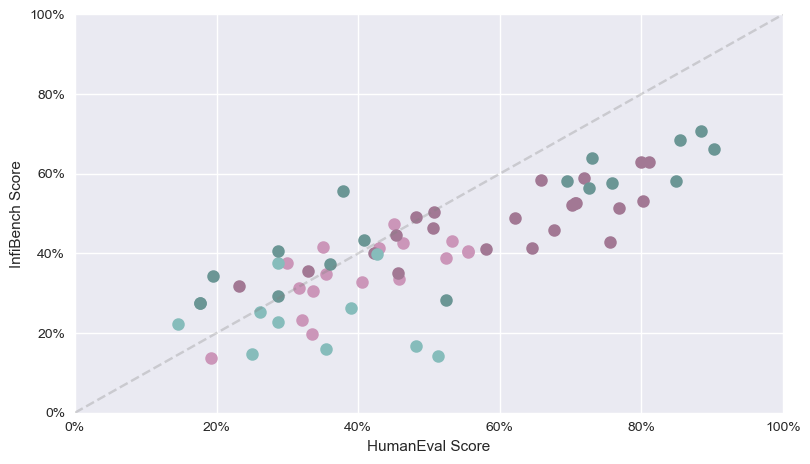

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import math

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(8, 4.5))

def my_scatter_plot(ax, data, model_type, model_domain, color, fmt='o'):
    z = []
    x = []
    y = []
    yerr_low = []
    yerr_high = []
    for row in data:
        if model_type is None or row['type'] == model_type:
            if model_domain is None or row['domain'] == model_domain:
                if math.isnan(float(row['humaneval'])): continue
                
                now_y = float(row['Overall Score_score'][:-1]) / 100

                # mean = float(row['Score'][:-1]) / 100
                # std = float(row['Std'][:-1]) / 100
                now_x = float(row['humaneval']) / 100
                
                x.append(now_x)
                y.append(now_y)


    ax.scatter(x, y, marker=fmt, linewidths=2, color=color)

    # [bar.set_alpha(0.5) for bar in bars]
    # [cap.set_alpha(0.5) for cap in caps]
    return x, y

fac = 1.5
code_color = (243./255./fac, 180./255./fac, 222./255./fac)
general_color = (161./255./fac, 225./255./fac, 224./255./fac)
# 
# code_color = (200./255./fac, 200./255./fac, 200./255./fac)
# general_color = (200./255./fac, 200./255./fac, 200./255./fac)


fac = 1.2
code_base_color = (243./255./fac, 180./255./fac, 222./255./fac)
general_base_color = (161./255./fac, 225./255./fac, 224./255./fac)
# 
# code_base_color = (200./255./fac, 200./255./fac, 200./255./fac)
# general_base_color = (200./255./fac, 200./255./fac, 200./255./fac)

x1, y1 = my_scatter_plot(ax, corr_data, 'Base', 'Code', code_base_color)
x2, y2 = my_scatter_plot(ax, corr_data, 'Finetuned', 'Code', code_color)

x3, y3 = my_scatter_plot(ax, corr_data, 'Base', 'General', general_base_color)
x4, y4 = my_scatter_plot(ax, corr_data, 'Finetuned', 'General', general_color)

x = x1 + x2 + x3 + x4
y = y1 + y2 + y3 + y4
print(np.corrcoef(x, y))
print(len(x), len(y))


ax.set(xlim=(0.0, 1.0), 
        ylim=(0.0, 1.0), )

ax.plot([0., 1.], [0., 1.], '--', color=(0.5, 0.5, 0.5), alpha=0.3)


vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

plt.xlabel('HumanEval Score')
plt.ylabel('InfiBench Score')

plt.subplots_adjust(bottom=0.10, right=0.975, left=0.09, top=0.985)

plt.savefig('all_results_humaneval_and_qa.pdf', dpi=100)